### Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Load the dataset and EDA 

In [2]:
df=pd.read_csv('Mall_Customers.csv')

In [3]:
df.head(3)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [4]:
df.shape

(200, 5)

In [5]:
len(df[df.duplicated()])

0

In [6]:
df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df.rename(columns={'Genre':'Gender'},inplace=True)

In [9]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [10]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

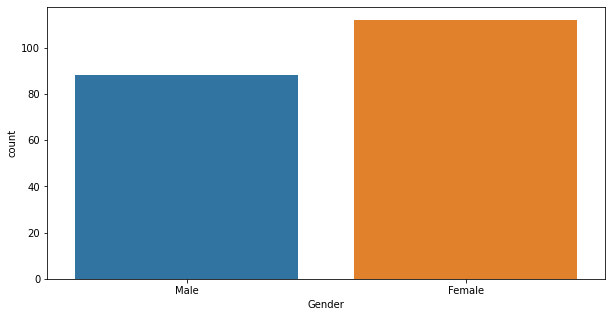

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='Gender')
plt.show()

In [12]:
df['Gender']=pd.get_dummies(df['Gender']).values.astype('int')

In [13]:
df['Gender'].value_counts()

1    112
0     88
Name: Gender, dtype: int64

In [14]:
df.head(4)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77


In [15]:
df['Age'].value_counts()

32    11
35     9
19     8
31     8
30     7
49     7
40     6
38     6
47     6
27     6
36     6
23     6
34     5
20     5
29     5
50     5
48     5
21     5
24     4
18     4
28     4
67     4
59     4
54     4
43     3
60     3
45     3
39     3
33     3
37     3
22     3
25     3
46     3
68     3
52     2
44     2
66     2
57     2
26     2
53     2
42     2
63     2
70     2
51     2
58     2
65     2
41     2
55     1
69     1
64     1
56     1
Name: Age, dtype: int64

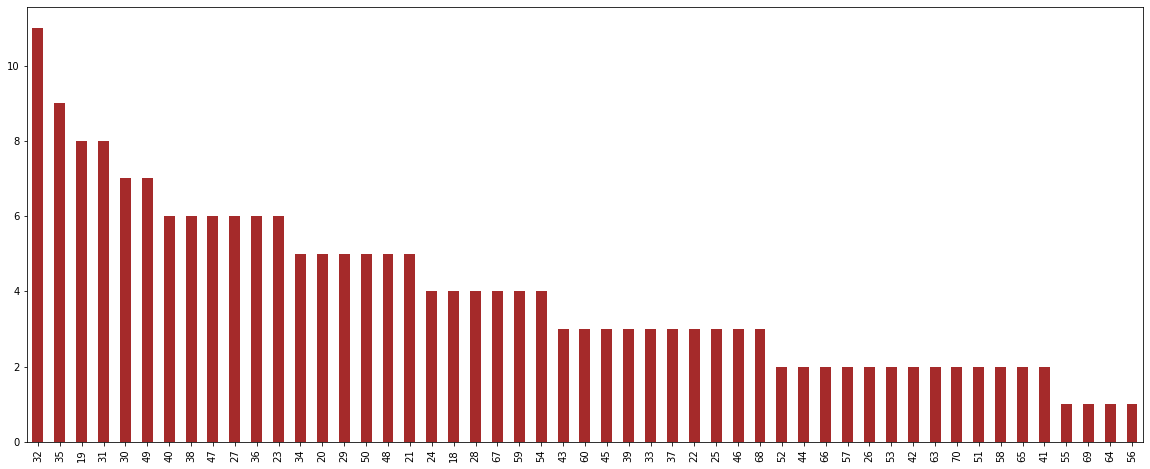

In [16]:
plt.figure(figsize=(20,8))
df['Age'].value_counts().plot(kind='bar',color='brown')
plt.show()

In [17]:
df.drop('CustomerID',axis=1,inplace=True)

In [18]:
df.head(4)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77


In [19]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [20]:
dfc=df.copy()
dfc.iloc[:,1:]=sc.fit_transform(dfc.iloc[:,1:])

In [21]:
dfc.head(3)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,-1.424569,-1.738999,-0.434801
1,0,-1.281035,-1.738999,1.195704
2,1,-1.352802,-1.700830,-1.715913


### Model building and evolution 

In [22]:
from sklearn import cluster
from sklearn.cluster import KMeans

In [23]:
cluster_range=range(1,15)
error=[]

for n in cluster_range:
    cluster=KMeans(n_clusters=n,n_init=10,random_state=42)
    cluster.fit(dfc)
    
    labels=cluster.labels_
    centroid=cluster.cluster_centers_
    error.append(cluster.inertia_)
    
cluster_df=pd.DataFrame({'num_clusters':cluster_range, 'cluster_error':error})
cluster_df

,num_clusters,cluster_error
0,1,649.280000
1,2,438.522412
2,3,344.405429
3,4,254.282907
4,5,216.784902
5,6,181.951436
6,7,164.776583
7,8,153.119544
8,9,142.212628
9,10,132.609853


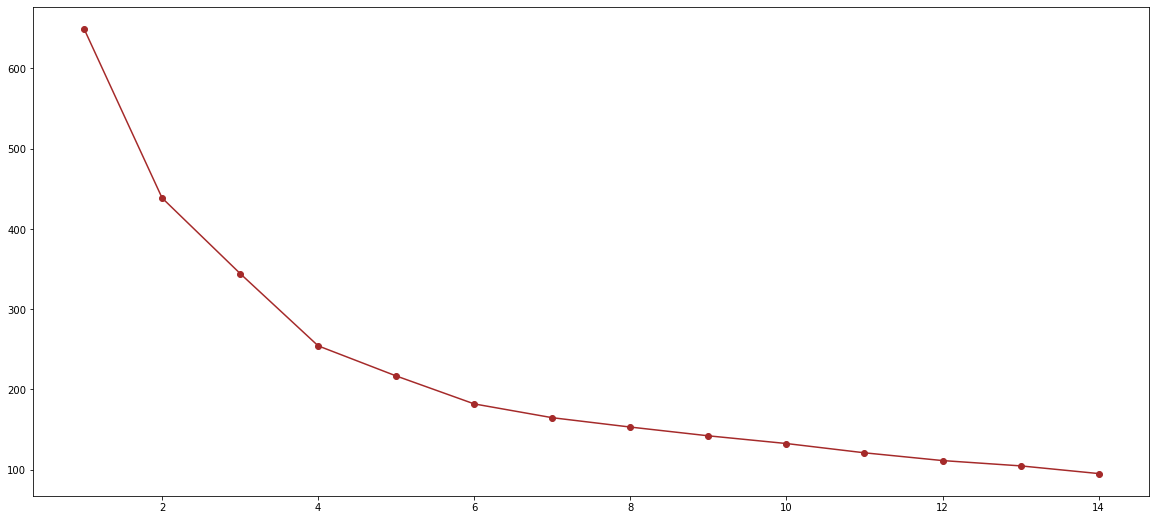

In [24]:
plt.figure(figsize=(20,9))
plt.plot(cluster_df['num_clusters'],cluster_df['cluster_error'], marker='o',color='brown')
plt.show()

From the elbow plot it is clear that for `k=4` the interia starts to drop significantly. So the clusters are labeled as 0, 1, 2, 3.

In [25]:
kmeans= KMeans(n_clusters=4,n_init=10,random_state=42)
kmeans.fit(dfc)

KMeans(n_clusters=4, n_init=10, random_state=42)

In [26]:
kmeans.labels_[:10]

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0])

In [27]:
Labels=kmeans.labels_

In [28]:
df['Labels']=Labels

In [29]:
df.head(5)

,Gender,Age,Annual Income (k$),Spending Score (1-100),Labels
0,0,19,15,39,0
1,0,21,15,81,0
2,1,20,16,6,0
3,1,23,16,77,0
4,1,31,17,40,0


In [30]:
df['Labels'].value_counts()

1    65
0    57
3    40
2    38
Name: Labels, dtype: int64

In [31]:
df.dtypes

Gender                    int32
Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
Labels                    int32
dtype: object

### Annual Income vs Spending Score 

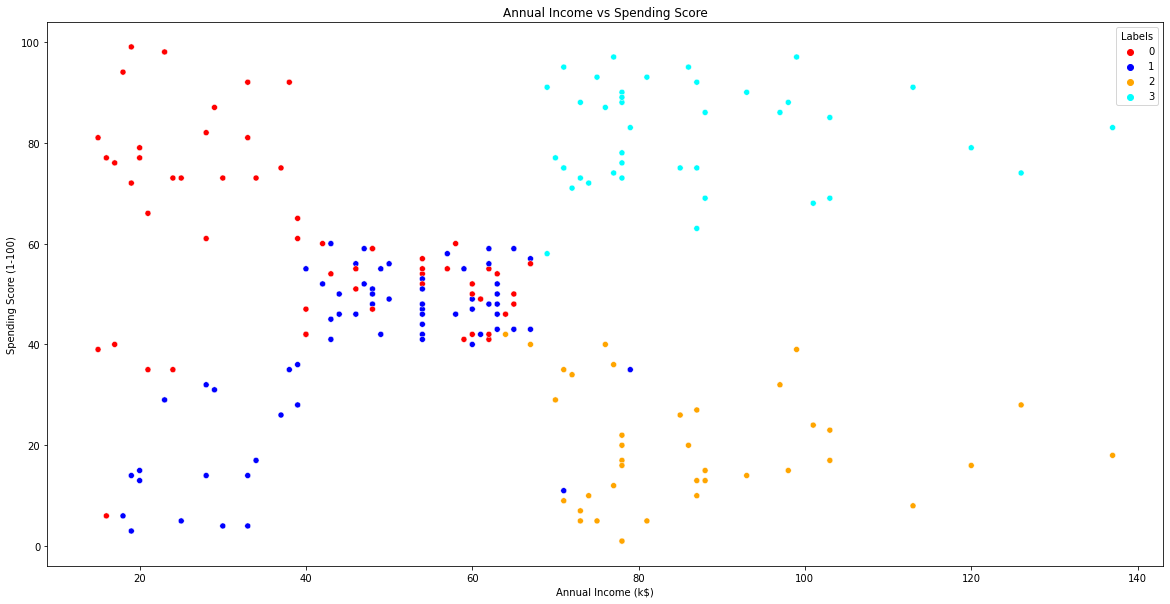

In [32]:
plt.figure(figsize=(20,10))
label_colors = {0: 'red',1: 'blue',2: 'orange',3:'cyan'}
sns.scatterplot(data=df, x='Annual Income (k$)',y='Spending Score (1-100)',hue='Labels',palette=label_colors)
plt.title('Annual Income vs Spending Score')
plt.show()

### Age vs Spending Score

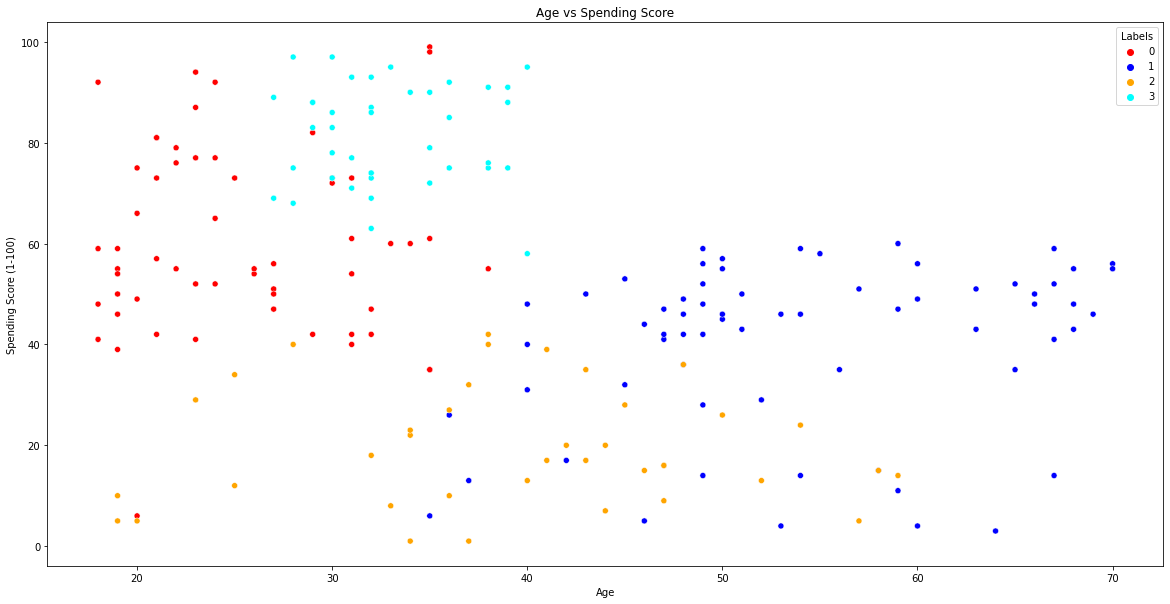

In [33]:
plt.figure(figsize=(20,10))
label_colors = {0: 'red',1: 'blue',2: 'orange',3:'cyan'}
sns.scatterplot(data=df, x='Age',y='Spending Score (1-100)',hue='Labels',palette=label_colors)
plt.title('Age vs Spending Score')
plt.show()